Basic set up for data analysis

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import warnings 

warnings.filterwarnings("ignore") #librosa has some and the libraries it uses will be depreciating the use of a library for loading. Just a future warning


print(list(os.listdir('../data')))

['RnB', 'Amapiano', 'Favela-Funk', 'Reggae', 'Funky-Soul', 'Soca', 'Jungle', 'Neo-Soul', 'Bossa-Nova', 'Samba', 'Reggaeton']


In [27]:
y, sr = librosa.load("../data/RnB/10-Seconds-Split/Aaliyah - Are You That Somebody_000.mp3")

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')
print('Check Len of Audio:', 221206/22050)

y: [-1.2052257e-13 -4.2931479e-13 -5.3168201e-13 ... -6.0203141e-01
 -7.0499802e-01 -5.4576087e-01] 

y shape: (221206,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 10.03201814058957


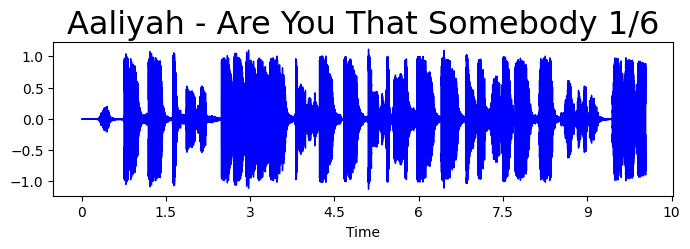

In [37]:
plt.figure(figsize = (8, 2))
librosa.display.waveshow(y = y, sr = sr, color = "blue");
plt.title("Aaliyah - Are You That Somebody 1/6", fontsize = 23);

Shape of D object: (1025, 433)


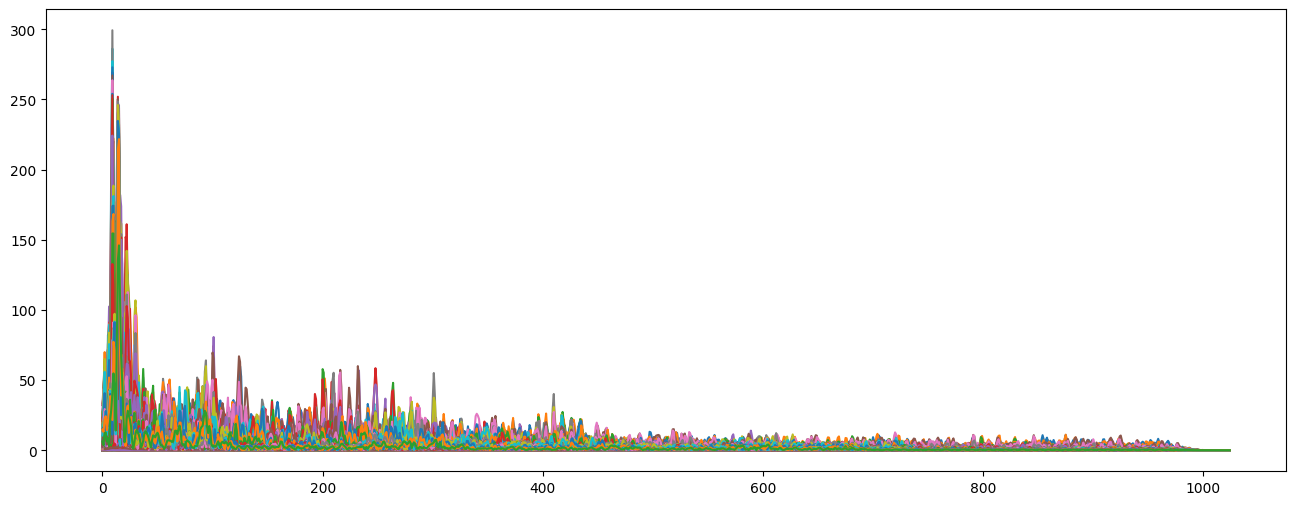

In [39]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(y, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))
plt.figure(figsize = (16, 6))
plt.plot(D);

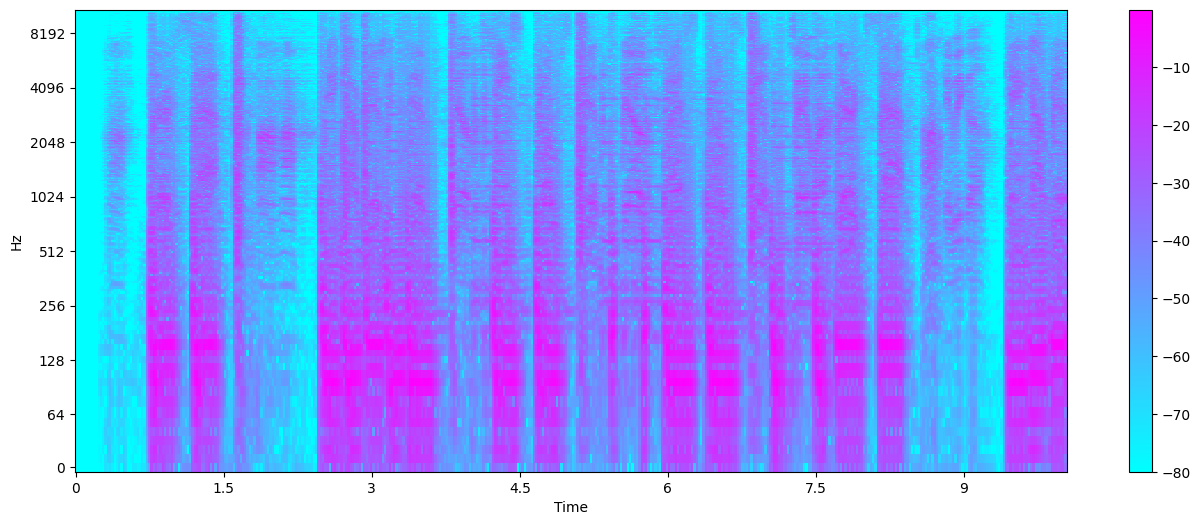

In [40]:
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

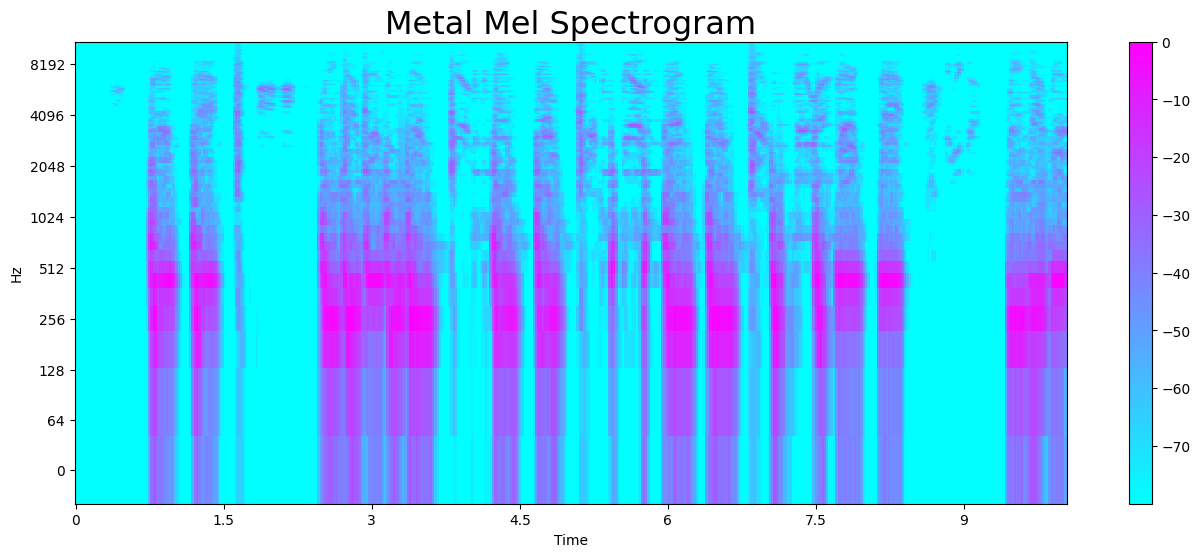

In [42]:
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23);


In the context of audio analysis, the term "delta" refers to a way of calculating the rate of change of a feature over time. In the case of the librosa.feature.delta function, it's used to compute the delta feature of a given feature matrix, typically used in the field of audio signal processing.

Delta features provide information about the changes in a feature over successive frames of an audio signal. They are useful for capturing dynamic changes in audio characteristics, such as pitch, loudness, and timbral qualities, over time.

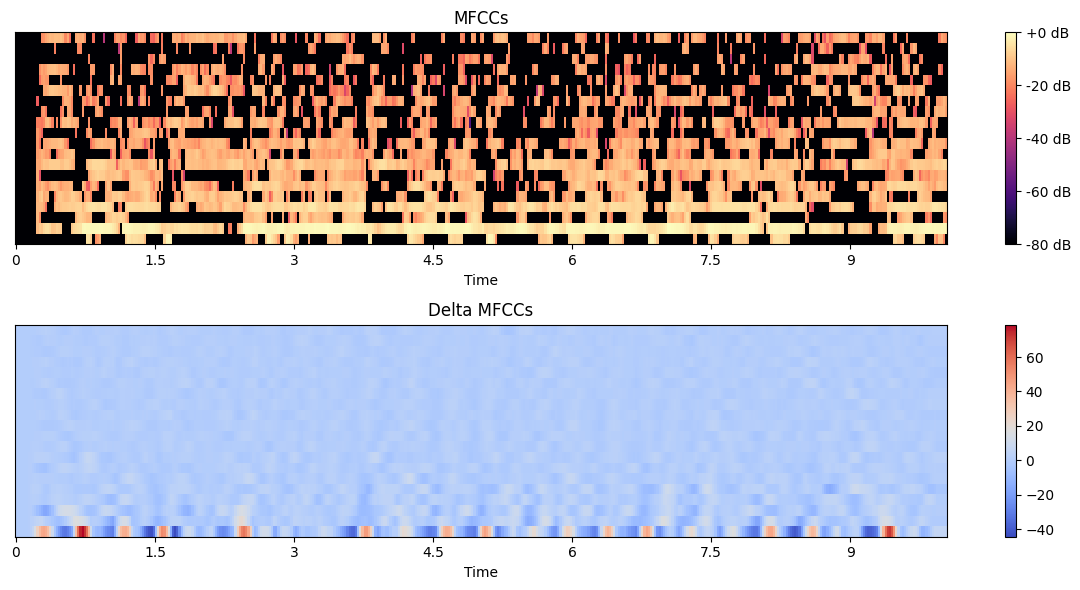

In [44]:
mfccs = librosa.feature.mfcc(y=y, sr=sr)

# Compute the delta MFCCs feature matrix
delta_mfccs = librosa.feature.delta(mfccs)
mfcc_delta2 = librosa.feature.delta(mfcc, order=2)

# Visualize the MFCCs and delta MFCCs
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.power_to_db(mfccs, ref=np.max), x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs')
plt.subplot(2, 1, 2)
librosa.display.specshow(delta_mfccs, x_axis='time')
plt.colorbar()
plt.title('Delta MFCCs')
plt.tight_layout()
plt.show()
plt.subplot(2, 1, 2)
librosa.display.specshow(mfcc_delta2, x_axis='time')
plt.colorbar()
plt.title('DeltaDelta MFCCs')
plt.tight_layout()
plt.show()


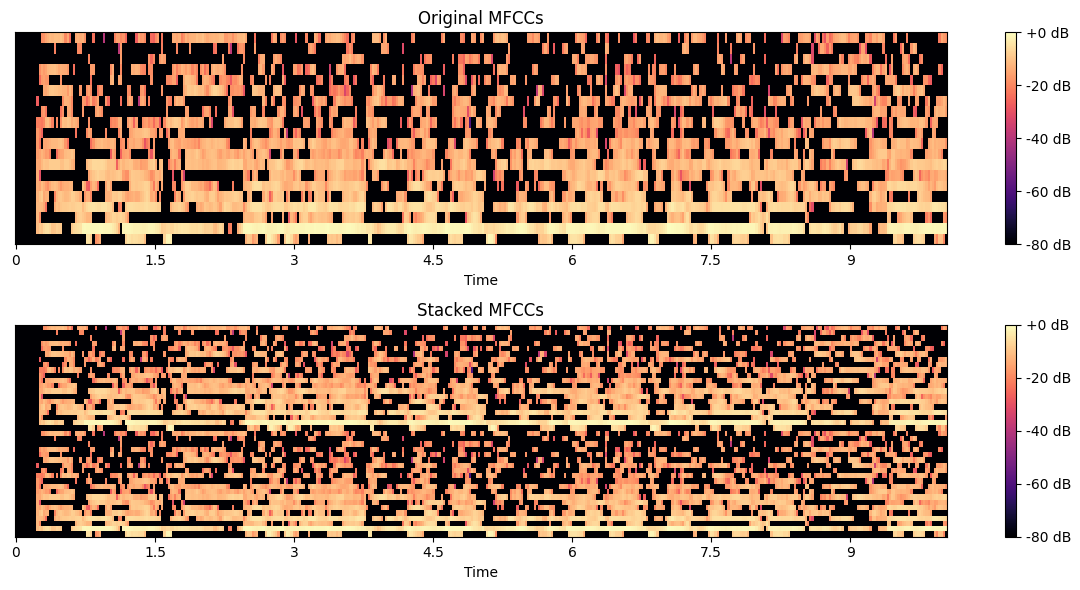

In [47]:

# Stack memory to capture temporal dynamics
stacked_mfccs = librosa.feature.stack_memory(mfccs)

# Visualize the original and stacked MFCCs
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.power_to_db(mfccs, ref=np.max), x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Original MFCCs')
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(stacked_mfccs, ref=np.max), x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Stacked MFCCs')
plt.tight_layout()
plt.show()